In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

In [2]:
# file = open("SMSSpamCollection", 'r')
# text = file.readlines()
# text

In [3]:
# temp_text = [i.split("\t") for i in text]
# labels = [i[0] for i in temp_text]
# texts = [i[1].strip("\n") for i in temp_text]
# df = pd.DataFrame({"label" : labels,
#                    "text" : texts})
# df.head()

df = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Separate the input and output variables

In [6]:
# input data
x = df['text']

# output data
y = df['label']

Explore the data

<Axes: xlabel='label', ylabel='count'>

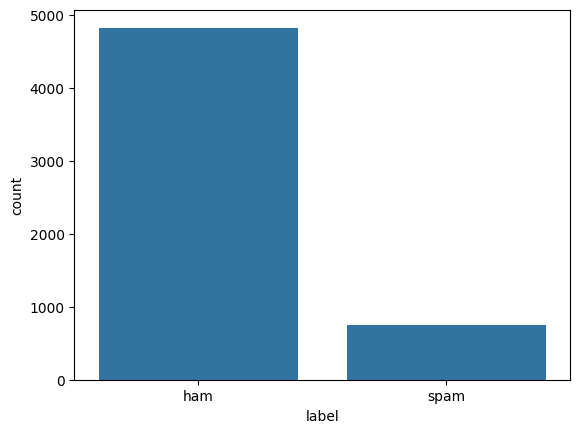

In [8]:
sns.countplot(x = y)

In [9]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x27e3104c5c0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '87%'),
  Text(0.5475662602592474, -0.2452981667801496, '13%')])

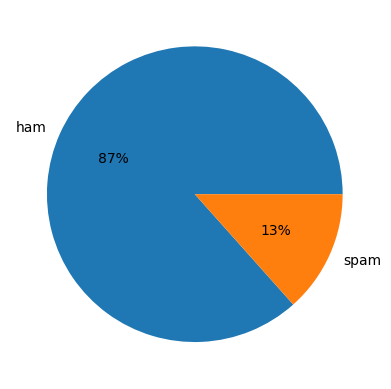

In [10]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = "%2.f%%")

In [11]:
# pip install wordcloud pillow -U

Separate the ham and spam messages

In [13]:
ham = x[y == 'ham']
spam = x[y == 'spam']

In [14]:
spam, ham

(2       Free entry in 2 a wkly comp to win FA Cup fina...
 5       FreeMsg Hey there darling it's been 3 week's n...
 8       WINNER!! As a valued network customer you have...
 9       Had your mobile 11 months or more? U R entitle...
 11      SIX chances to win CASH! From 100 to 20,000 po...
                               ...                        
 5537    Want explicit SEX in 30 secs? Ring 02073162414...
 5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
 5547    Had your contract mobile 11 Mnths? Latest Moto...
 5566    REMINDER FROM O2: To get 2.50 pounds free call...
 5567    This is the 2nd time we have tried 2 contact u...
 Name: text, Length: 747, dtype: object,
 0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
 6       Even my brother is not like to speak with me. ...
               

In [15]:
ham = " ".join(ham)
len(ham)

349727

In [16]:
spam = " ".join(spam)
len(spam)

104333

In [17]:
from wordcloud import WordCloud

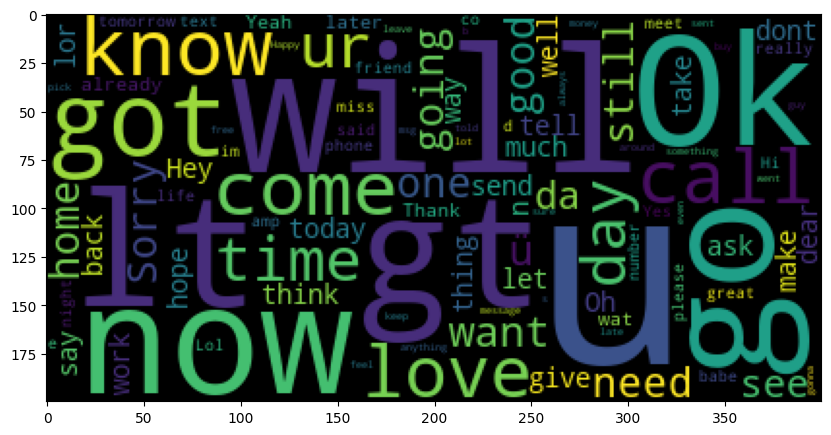

In [18]:
wc_notspam = WordCloud(background_color = 'black',
                      max_words = 100).generate(ham)

plt.figure(figsize = (10, 8))
plt.imshow(wc_notspam)

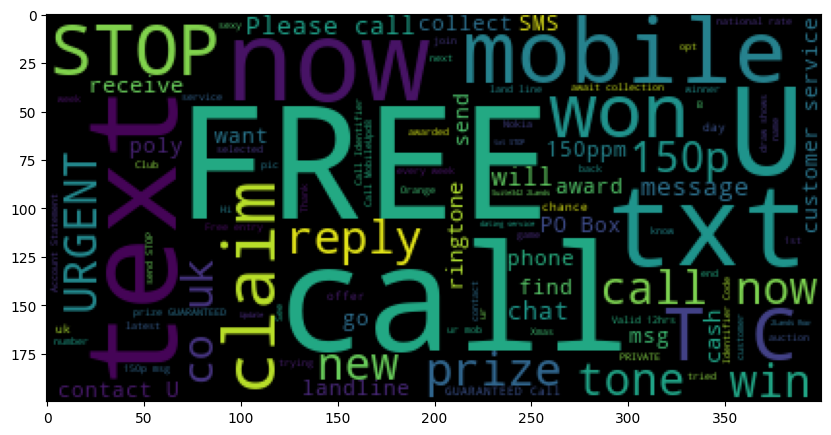

In [19]:
wc_spam = WordCloud(background_color = 'black',
                      max_words = 100).generate(spam)

plt.figure(figsize = (10, 8))
plt.imshow(wc_spam)

In [20]:
wc_notspam.words_

{'u': 1.0,
 'will': 0.33096446700507615,
 'lt gt': 0.2802030456852792,
 'Ok': 0.2649746192893401,
 'now': 0.2578680203045685,
 'go': 0.25583756345177666,
 'got': 0.2365482233502538,
 'know': 0.2182741116751269,
 'come': 0.21116751269035533,
 'call': 0.20812182741116753,
 'love': 0.20609137055837565,
 'time': 0.20101522842639594,
 'ur': 0.19898477157360406,
 'day': 0.18883248730964466,
 'want': 0.18781725888324874,
 'one': 0.17766497461928935,
 'need': 0.17563451776649747,
 'going': 0.1715736040609137,
 'good': 0.166497461928934,
 'Sorry': 0.15939086294416244,
 'ü': 0.15634517766497463,
 'home': 0.15532994923857868,
 'still': 0.1532994923857868,
 'da': 0.14416243654822336,
 'see': 0.14213197969543148,
 'today': 0.1401015228426396,
 'think': 0.13401015228426397,
 'n': 0.132994923857868,
 'lor': 0.12791878172588833,
 'tell': 0.12690355329949238,
 'dont': 0.12284263959390863,
 'say': 0.12081218274111676,
 'back': 0.12081218274111676,
 'Oh': 0.11573604060913706,
 'thing': 0.1147208121827411

In [21]:
wc_spam.words_

{'FREE': 1.0,
 'call': 0.875,
 'text': 0.63,
 'U': 0.59,
 'txt': 0.5,
 'now': 0.5,
 'mobile': 0.5,
 'won': 0.365,
 'T C': 0.33,
 'claim': 0.315,
 'STOP': 0.315,
 'reply': 0.31,
 'prize': 0.305,
 'call now': 0.29,
 'URGENT': 0.28,
 'win': 0.27,
 'new': 0.27,
 'tone': 0.265,
 'co uk': 0.245,
 '150p': 0.24,
 'Please call': 0.23,
 'will': 0.22,
 'message': 0.21,
 'chat': 0.2,
 'ringtone': 0.18,
 'cash': 0.17,
 'receive': 0.165,
 'send': 0.145,
 'award': 0.14,
 'want': 0.135,
 'poly': 0.135,
 'customer service': 0.135,
 'PO Box': 0.135,
 'contact U': 0.135,
 'msg': 0.125,
 'go': 0.125,
 'SMS': 0.12,
 'landline': 0.12,
 '150ppm': 0.115,
 'find': 0.115,
 'collect': 0.115,
 'phone': 0.115,
 'GUARANTEED Call': 0.115,
 'day': 0.11,
 'uk': 0.11,
 'offer': 0.11,
 'chance': 0.11,
 'prize GUARANTEED': 0.11,
 'contact': 0.105,
 'pic': 0.105,
 'week': 0.1,
 'customer': 0.1,
 'send STOP': 0.1,
 'national rate': 0.1,
 'back': 0.095,
 'ur': 0.095,
 'awarded': 0.095,
 'See': 0.095,
 'Club': 0.095,
 'Orang

# Data Preparation

In [23]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [24]:
sent = 'Hello friends! How are you? I like Python Programming.'

In [25]:
tokens1 = word_tokenize(sent)

In [26]:
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'I',
 'like',
 'Python',
 'Programming',
 '.']

In [27]:
# Remove punctuations
tokens2 = [token for token in tokens1 if token.isalpha() or token.isdigit()]

In [28]:
tokens2

['Hello', 'friends', 'How', 'are', 'you', 'I', 'like', 'Python', 'Programming']

In [29]:
swords = stopwords.words('english')

In [30]:
# Remove stopwords
tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

In [31]:
tokens3

['hello', 'friends', 'like', 'python', 'programming']

In [32]:
# Removing the affixes
from nltk.stem import PorterStemmer
ps = PorterStemmer()

tokens4 = [ps.stem(token) for token in tokens3]

In [33]:
tokens4

['hello', 'friend', 'like', 'python', 'program']

In [34]:
# Stop words
swords = stopwords.words('english')
# Removing the affixes
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def clean_text(sent):
    tokens1 = word_tokenize(sent)
    # Remove punctuations
    tokens2 = [token for token in tokens1 if token.isalpha()]
    # Remove stopwords
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    # Stemming
    tokens4 = [ps.stem(token) for token in tokens3]

    return tokens4
    

In [35]:
clean_text(sent)

['hello', 'friend', 'like', 'python', 'program']

In [36]:
sent1 = 'It was nice working with you. Have a great day!'

In [37]:
clean_text(sent1)

['nice', 'work', 'great', 'day']

In [38]:
x.apply(clean_text)

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [time, tri, contact, u, pound, prize, claim, e...
5568                       [ü, b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

In [39]:
type(x)

pandas.core.series.Series

# TF*IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
tfidf = TfidfVectorizer(analyzer = clean_text)

In [43]:
x_new = tfidf.fit_transform(x)

In [44]:
x_new.shape

(5572, 5925)

In [45]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniy', ..., 'zyada', 'é', 'ü'], dtype=object)

In [46]:
len(tfidf.get_feature_names_out())

5925

# Cross-Validation

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state = 0)

In [50]:
x_train.shape

(4179, 5925)

In [51]:
x_test.shape

(1393, 5925)

In [52]:
svm = SVC(kernel = 'linear')

In [53]:
model = svm.fit(x_train, y_train)

In [54]:
y_pred = model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [56]:
accuracy_score(y_test, y_pred)

0.9827709978463748

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



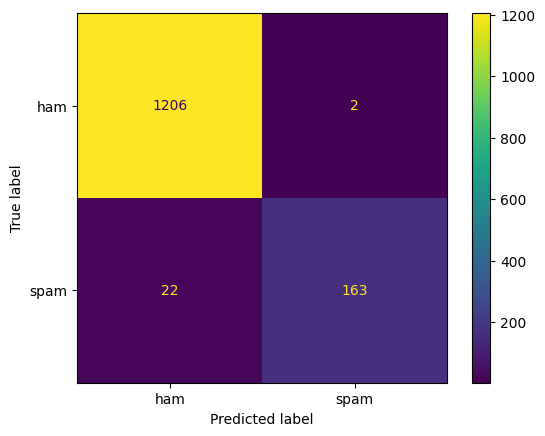

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [59]:
svm = SVC(kernel = 'rbf')
model1 = svm.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
accuracy_score(y_test, y_pred1)

0.9813352476669059

In [60]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



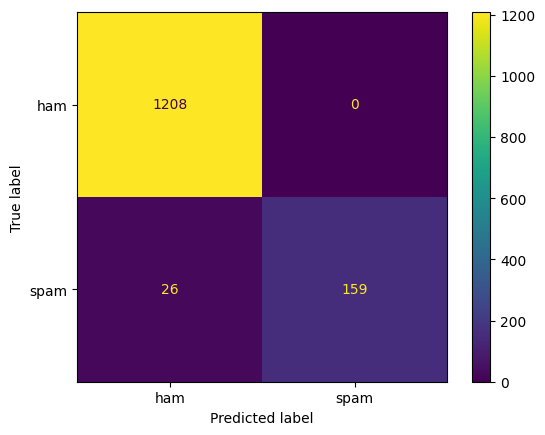

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)

In [62]:
svm = SVC(kernel = 'poly')
model2 = svm.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
accuracy_score(y_test, y_pred2)

0.949748743718593

In [63]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1208
        spam       1.00      0.62      0.77       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393



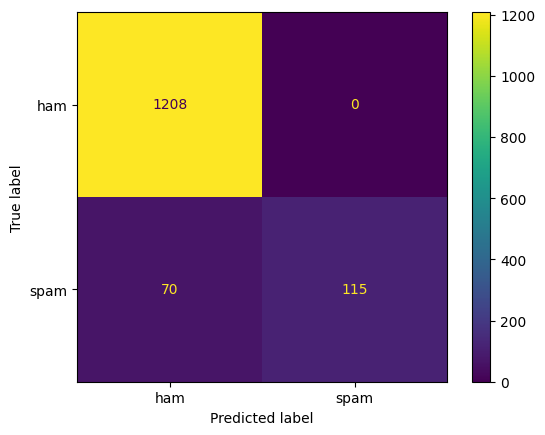

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

In [65]:
svm = SVC(kernel = 'sigmoid')
model3 = svm.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
accuracy_score(y_test, y_pred3)

0.9798994974874372

In [66]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.98      0.87      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



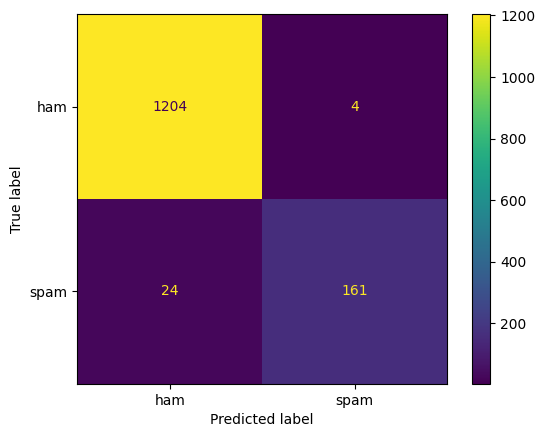

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)

# Validation

In [69]:
df = pd.read_csv("sample.csv", sep = "\t", names = ['text'])

In [70]:
df

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [71]:
ser = df["text"].apply(clean_text)
type(ser)

pandas.core.series.Series

In [72]:
x_new2 = tfidf.transform(df["text"])
x_new2

<3x5925 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [139]:
svm.predict(x_new2)

array(['ham', 'spam', 'ham'], dtype=object)